In [3]:
from numpy import *
from matplotlib.pyplot import *
from scipy import io
import numpy.polynomial.legendre as leg
%matplotlib inline

In [4]:
def vsf(th):
    return .5 * np.exp(-th/2) / (1 - np.exp(-np.pi/2))

# Smallest difference between two angles
def angle_diff(th,thp):
    return np.pi - abs(abs(th - thp) - pi)

## Numerically check bound on scattering coefficients

In [5]:
# Check to see whether sum of scattering coefs. = 2
# nth = number of theta values
# kk = integer index num. of theta to diff other angles wrt.
def check_scat_sum(nth,kk):
    th_un, ww_un = leg.leggauss(nth)
    th_vals = pi * (th_un + 1)
    weights = pi * ww_un
    
    th = th_vals[kk]
    thp = th_vals[th_vals!=th]
    ww = weights[th_vals!=th]
    
    return sum(vsf(angle_diff(th,thp)) * ww)

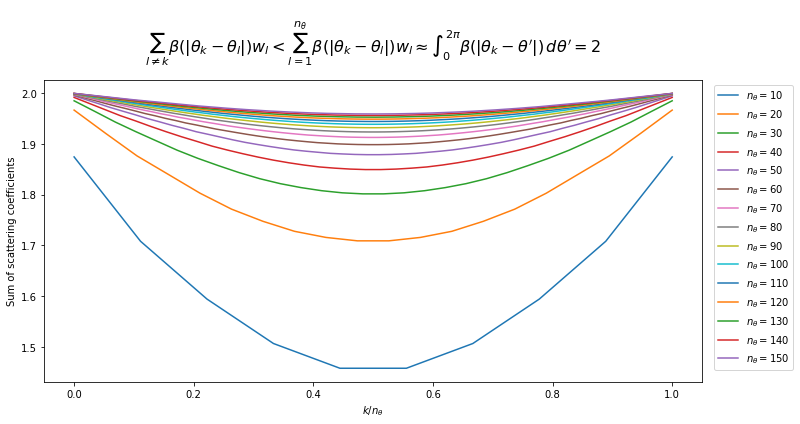

In [6]:
figure(figsize=[10,6])
for nth in range(10,160,10):
    res = zeros(nth)
    for kk in range(nth):
        res[kk] = check_scat_sum(nth,kk)
    plot(linspace(0,1,nth),res,label=r'$n_\theta = {}$'.format(nth))
legend(bbox_to_anchor=[1.01,1],loc='upper left')
xlabel(r'$k / n_\theta$')
ylabel(r"Sum of scattering coefficients")
title(r"$\sum_{l \neq k} \beta(|\theta_k - \theta_l|) w_l \
        < \sum_{l=1}^{n_\theta} \beta(|\theta_k - \theta_l|) w_l \
        \approx \int_0^{2\pi}\beta(|\theta_k-\theta'|) \,d\theta' = 2$"+'\n',fontsize=16)
tight_layout()

\begin{equation}
    \sum_{l \neq k} \beta(|\theta_k - \theta_l|) w_l \
    < \sum_{l=1}^{n_\theta} \beta(|\theta_k - \theta_l|) w_l \
    \approx \int_0^{2\pi}\beta(|\theta_k-\theta'|) \,d\theta' = 2
\end{equation}

While the coefficients are not exactly 2, they do seem to be bounded above by 2
Adding in the l=k term to the sum reduces the error significantly, so all sums are much closer to 2 ~5e-2.
However, 2 is no longer an upper bound then.

## Test diagonal dominalizer :P

In [11]:
# Plot diagonal dominance quantity (D - Q) as a function of row number
# Add quantity mu to D to get D' = D + Q. If D' > Q <=> D' - Q = D + mu - Q > 0 (plot is positive),
# then diagonal dominance is achieved
def plot_dd(A,mu):
    # Diagonal dominance quantity, D - Q (pre-shift)
    ddq = zeros(nrows)
    row_list = arange(nrows)
    for k in row_list:
        if k%100 == 0:
            print('k={}'.format(k))
        D = abs(A[k,k])
        Q = abs(A[k,:k]).sum() + abs(A[k,k+1:]).sum()
        ddq[k] = D - Q
    # Post-shift DD quantity, D' - Q
    ddq_p = ddq + mu
    
    figure(figsize=[10,6])
    plot(row_list,ddq,label="$D - Q$ (pre)")
    plot(row_list,ddq_p,label="$D' - Q$ (post)")
    
    print("Min (pre) : {:.3e}".format(min(ddq)))
    print("Min (post): {:.3e}".format(min(ddq_p)))
    
    title('Diagonal dominance plot')
    legend(bbox_to_anchor=(1.01,1),loc='upper left')

In [12]:
# Grid parameters
nx = 20
ny = 20
nth = 24
nrows = nx * ny * nth

# Load matrix to test
dct = io.loadmat('../mat/ddom_{}x{}x{}_012.mat'.format(nx,ny,nth))
A = dct['A']

dx = 1/nx
dy = 1/ny

# IOPS
a_w = 1
b_w = 1
a_k = 5
b_k = 1

# Maximum number density of individuals 
ind_up = 2

# Max/min abs. coef.
a_up = a_k * ind_up
a_dn = a_w
# Max/min scat. coef.
b_up = a_k * ind_up
b_dn = b_w

In [13]:
# Term to add to create diagonal dominance
# mu = a_up - b_dn * (2*pi - 1) - 1/dx - 4/dy # (technically correct)
# mu = a_up - b_dn * (2*pi - 1) - nx - 4*ny     # (equivalent for normailized length scale)
mu = 1/dx + 4/dy + b_up * (2*pi-1) - a_dn

k=0
k=100
k=200
k=300
k=400
k=500
k=600
k=700
k=800
k=900
k=1000
k=1100
k=1200
k=1300
k=1400
k=1500
k=1600
k=1700
k=1800
k=1900
k=2000
k=2100
k=2200
k=2300
k=2400
k=2500
k=2600
k=2700
k=2800
k=2900
k=3000
k=3100
k=3200
k=3300
k=3400
k=3500
k=3600
k=3700
k=3800
k=3900
k=4000
k=4100
k=4200
k=4300
k=4400
k=4500
k=4600
k=4700
k=4800
k=4900
k=5000
k=5100
k=5200
k=5300
k=5400
k=5500
k=5600
k=5700
k=5800
k=5900
k=6000
k=6100
k=6200
k=6300
k=6400
k=6500
k=6600
k=6700
k=6800
k=6900
k=7000
k=7100
k=7200
k=7300
k=7400
k=7500
k=7600
k=7700
k=7800
k=7900
k=8000
k=8100
k=8200
k=8300
k=8400
k=8500
k=8600
k=8700
k=8800
k=8900
k=9000
k=9100
k=9200
k=9300
k=9400
k=9500
Min (pre) : 1.000e+00
Min (post): 1.528e+02


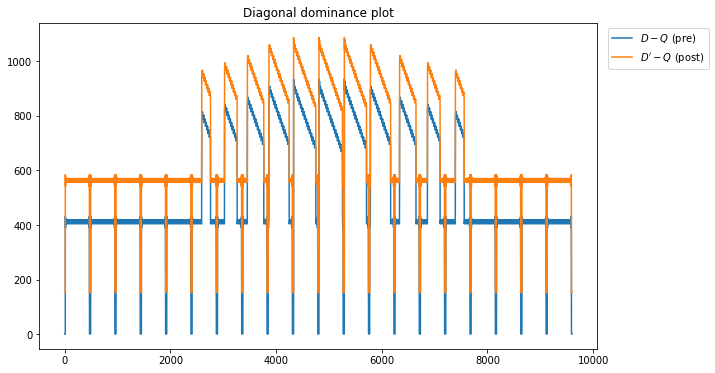

In [14]:
plot_dd(A,mu)

In [ ]:
# Try to solve DDOM w/ spsolve & gauss_seidel